# GMRT conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as exc:
    print(f"Could not import XRADIO: {exc}")
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.50 already installed.


## Download dataset

In [1]:
import toolviper
import os
from pathlib import Path
file_path_os = "gmrt.ms"

while not os.path.exists(file_path_os):
    toolviper.utils.data.download(file="gmrt.ms")

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "gmrt.ms"
main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "small_lofar.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    overwrite=True,
    main_chunksize=main_chunksize,
)

Output file:  small_lofar.ps.zarr
[2025-04-11 12:26:26,541]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-04-11 12:26:26,543]     INFO    viperlog:  Number of partitions: 1 
[2025-04-11 12:26:26,544]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [3], SCAN [7] 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,gmrt_0,[obs_0],"(2, 435, 64, 4)","[RR, RL, LR, LL]",[7],spw_0,[3C286_3],[3C286_3],[],"[fk5, 13h31m08.28s, 30d30m32.90s]",551562500.0,748437500.0


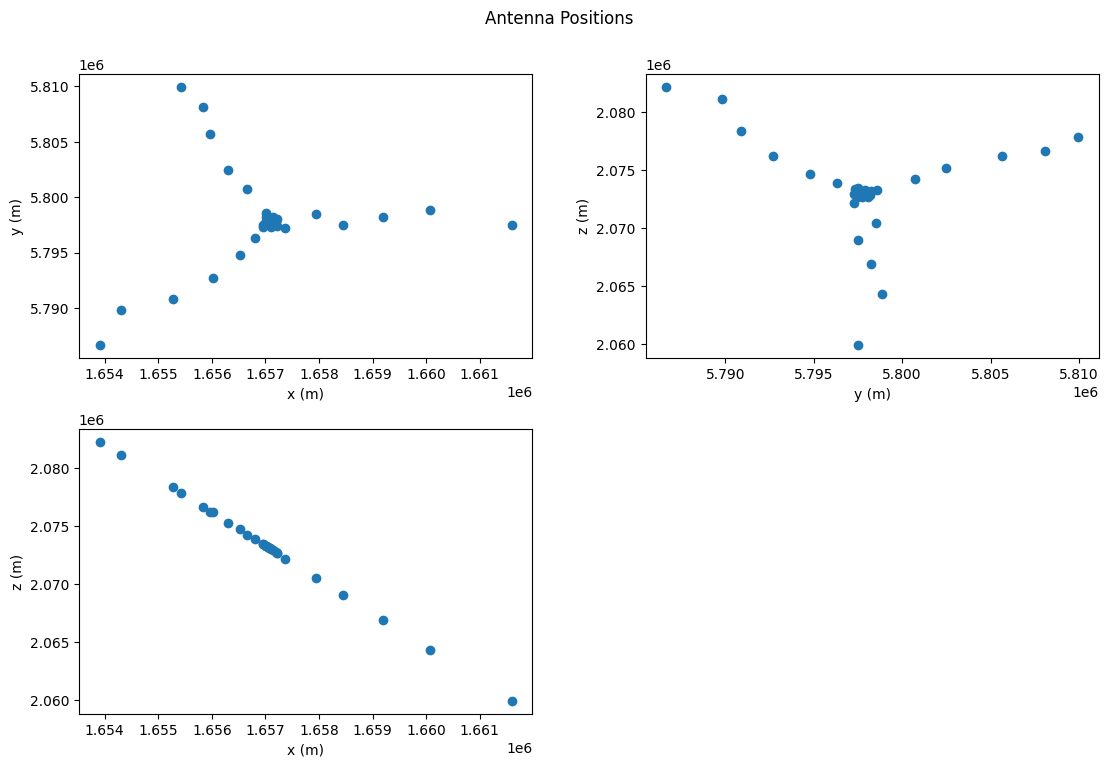

In [5]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=False)

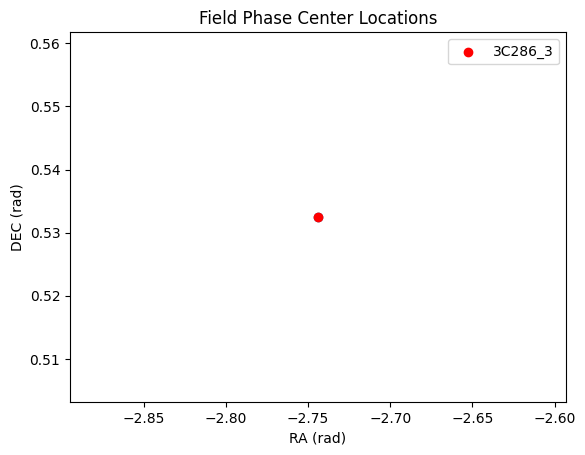

In [6]:
ps_xdt.xr_ps.plot_phase_centers()

## Measurement Sets

### Visibility dataset

In [7]:
ms_xdt = ps_xdt["gmrt_0"]
ms_xdt

<xarray.DataTree 'gmrt_0'>
Group: /gmrt_0
│   Dimensions:                     (time: 2, baseline_id: 435, frequency: 64,
│                                    polarization: 4, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U3 5kB ...
│       baseline_antenna2_name      (baseline_id) <U3 5kB ...
│     * baseline_id                 (baseline_id) int64 3kB 0 1 2 3 ... 432 433 434
│       field_name                  (time) <U27 216B ...
│     * frequency                   (frequency) float64 512B 5.516e+08 ... 7.484e+08
│     * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
│       scan_name                   (time) <U21 168B '7' '7'
│     * time                        (time) float64 16B 1.72e+09 1.72e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 7kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 223kB ...
│       TIME_CENTROID               (time, baseline_id) float64 7kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 21kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 2MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 891kB ...
│   Attributes:
│       creation_date:     2025-04-11T16:26:26.555248+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.50'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'intents': ['obs_0'], 'observer': ['TEST_PM'], 'proje...
│       processor_info:    {'sub_type': '', 'type': ''}
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /gmrt_0/antenna_xds
│       Dimensions:                 (antenna_name: 30, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U3 360B 'C00' 'C01' ... 'W05' 'W06'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 720B ...
│           polarization_type       (antenna_name, receptor_label) <U1 240B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station_name            (antenna_name) <U6 720B ...
│           telescope_name          (antenna_name) <U4 480B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 240B 45.0 45.0 ... 45.0 45.0
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 720B ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 480B 0.0 ....
│       Attributes:
│           overall_telescope_name:  GMRT
│           relocatable_antennas:    False
│           type:                    antenna
└── Group: /gmrt_0/field_and_source_base_xds
        Dimensions:                 (field_name: 1, sky_dir_label: 2, line_label: 1)
        Coordinates:
          * field_name              (field_name) <U27 108B '3C286_3'
          * line_label              (line_label) <U21 84B '0'
            line_name               (field_name, line_label) <U1 4B ''
          * sky_dir_label           (sky_dir_label) <U3 24B 'ra' 'dec'
            source_name             (field_name) <U27 108B '3C286_3'
        Data variables:
            FIELD_PHASE_CENTER      (field_name, sky_dir_label) float64 16B -2.744 0....
            LINE_REST_FREQUENCY     (field_name, line_label) float64 8B ...
            LINE_SYSTEMIC_VELOCITY  (field_name, line_label) float64 8B ...
            SOURCE_LOCATION         (field_name, sky_dir_label) float64 16B ...
        Attributes:
            type:     field_and_source

In [8]:
ms_xdt.coords["frequency"]

<xarray.DataArray 'frequency' (frequency: 64)> Size: 512B
array([5.515625e+08, 5.546875e+08, 5.578125e+08, 5.609375e+08, 5.640625e+08,
       5.671875e+08, 5.703125e+08, 5.734375e+08, 5.765625e+08, 5.796875e+08,
       5.828125e+08, 5.859375e+08, 5.890625e+08, 5.921875e+08, 5.953125e+08,
       5.984375e+08, 6.015625e+08, 6.046875e+08, 6.078125e+08, 6.109375e+08,
       6.140625e+08, 6.171875e+08, 6.203125e+08, 6.234375e+08, 6.265625e+08,
       6.296875e+08, 6.328125e+08, 6.359375e+08, 6.390625e+08, 6.421875e+08,
       6.453125e+08, 6.484375e+08, 6.515625e+08, 6.546875e+08, 6.578125e+08,
       6.609375e+08, 6.640625e+08, 6.671875e+08, 6.703125e+08, 6.734375e+08,
       6.765625e+08, 6.796875e+08, 6.828125e+08, 6.859375e+08, 6.890625e+08,
       6.921875e+08, 6.953125e+08, 6.984375e+08, 7.015625e+08, 7.046875e+08,
       7.078125e+08, 7.109375e+08, 7.140625e+08, 7.171875e+08, 7.203125e+08,
       7.234375e+08, 7.265625e+08, 7.296875e+08, 7.328125e+08, 7.359375e+08,
       7.390625e+08, 7.421875e+08, 7.453125e+08, 7.484375e+08])
Coordinates:
  * frequency  (frequency) float64 512B 5.516e+08 5.547e+08 ... 7.484e+08
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    0
    spectral_window_name:  spw_0
    type:                  spectral_coord
    units:                 ['Hz']

### Antenna dataset

In [9]:
ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /gmrt_0/antenna_xds
    Dimensions:                 (time: 2, baseline_id: 435, frequency: 64,
                                 polarization: 4, uvw_label: 3, antenna_name: 30,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U3 360B 'C00' 'C01' ... 'W05' 'W06'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 720B ...
        polarization_type       (antenna_name, receptor_label) <U1 240B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station_name            (antenna_name) <U6 720B ...
        telescope_name          (antenna_name) <U4 480B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 3kB 0 1 2 3 ... 431 432 433 434
      * frequency               (frequency) float64 512B 5.516e+08 ... 7.484e+08
      * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
      * time                    (time) float64 16B 1.72e+09 1.72e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 240B 45.0 45.0 ... 45.0 45.0
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 720B ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 480B 0.0 ....
    Attributes:
        overall_telescope_name:  GMRT
        relocatable_antennas:    False
        type:                    antenna

### Field and source dataset

In [10]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 4kB
Dimensions:                 (field_name: 1, sky_dir_label: 2, line_label: 1,
                             baseline_id: 435, frequency: 64, polarization: 4,
                             time: 2, uvw_label: 3)
Coordinates:
  * baseline_id             (baseline_id) int64 3kB 0 1 2 3 ... 431 432 433 434
  * frequency               (frequency) float64 512B 5.516e+08 ... 7.484e+08
  * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * time                    (time) float64 16B 1.72e+09 1.72e+09
  * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
  * field_name              (field_name) <U27 108B '3C286_3'
  * line_label              (line_label) <U21 84B '0'
    line_name               (field_name, line_label) <U1 4B ''
  * sky_dir_label           (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name             (field_name) <U27 108B '3C286_3'
Data variables:
    FIELD_PHASE_CENTER      (field_name, sky_dir_label) float64 16B -2.744 0....
    LINE_REST_FREQUENCY     (field_name, line_label) float64 8B ...
    LINE_SYSTEMIC_VELOCITY  (field_name, line_label) float64 8B ...
    SOURCE_LOCATION         (field_name, sky_dir_label) float64 16B ...
Attributes:
    type:     field_and_source